<a href="https://colab.research.google.com/github/BritneyMuller/colab-notebooks/blob/master/Seerfest%202020%20-%20Automating%20Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import Libraries
variable_name = ""
#@Import Libraries
import csv
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import re
from IPython.display import display

In [ ]:
#@title Upload GSC File
#@test
#@Upload GSC File
from google.colab import files
uploaded = files.upload()

#Upload data as "df" (dataframe)

In [ ]:
df = pd.read_csv("your-csv-name.csv")

#Look at the first 5 lines (this includes the header)


In [ ]:
df.head()

,Query,Clicks,Average Position,Site CTR,Impressions
0,seer interactive,3444,1.407144,0.597191,5767
1,google data studio,1352,8.237460,0.003478,388735
2,johari window exercise,992,1.128184,0.414196,2395
3,keywords everywhere,985,6.454694,0.006399,153930
4,google discovery,910,3.242859,0.060449,15054


#Look at the last 5 lines (this also includes the header)

In [ ]:
df.tail()

,Query,Clicks,Average Position,Site CTR,Impressions
27900,url crawl,0,26.597458,0.0,236
27901,how to do outreach,0,78.058824,0.0,17
27902,keyword search terms,0,80.666667,0.0,6
27903,native adv,0,4.375000,0.0,8
27904,power bi query editor remove duplicates,0,5.800000,0.0,5


#Load Filter-able Data Table

In [ ]:
 %load_ext google.colab.data_table
 df

A few interesting features of the data table display:

- Clicking the <button>Filter</button> button in the upper right allows you to search for terms or values in any particular column.
- Clicking on any column title lets you sort the results according to that column's value.
- The table displays only a subset of the data at a time. You can navigate through pages of data using the controls on the lower right.


#Generate Histogram of Impressions

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


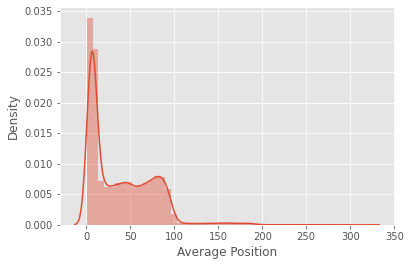

In [ ]:
sns.distplot(df['Impressions'])


#Describe the Dataset

In [ ]:
df.describe(include='all')

,Query,Clicks,Average Position,Site CTR,Impressions
count,27905,27905.000000,27905.000000,27905.000000,27905.000000
unique,27905,NaN,NaN,NaN,NaN
top,seo for mobile apps,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,2.523455,38.792771,0.139390,314.065114
std,NaN,28.043182,35.250051,0.291771,4075.845007
min,NaN,0.000000,1.000000,0.000000,1.000000
25%,NaN,0.000000,8.080000,0.000000,6.000000
50%,NaN,0.000000,28.968750,0.000000,17.000000
75%,NaN,1.000000,66.750000,0.058824,104.000000


#Drop all rows with Impressions < 17

In [ ]:
df.drop(df.loc[df['Impressions']<17].index, inplace=True)

#Reevaluate Distribution:

In [ ]:
sns.distplot(df['Impressions'])

In [ ]:
df.describe(include='all')

##Find all Queries that include 'power bi'


In [ ]:
df_filtered = df[(df['Query'].str.contains("power bi", regex=True)==True)]
df_filtered.head(100)

,Query,Clicks,Average Position,Site CTR,Impressions
10,power bi sort legend,430,1.017974,0.702614,612
28,sort legend power bi,201,1.013072,0.656863,306
36,power bi legend order,181,1.229236,0.601329,301
40,power bi bridge table,172,1.037647,0.404706,425
44,power bi change order of legend,159,1.068966,0.685345,232
...,...,...,...,...,...
1089,power bi - custom sort,11,1.500000,0.500000,22
1093,power bi order legend by value,11,1.076923,0.846154,13
1099,how to create power bi template,11,2.833333,0.611111,18
1100,many to many in power bi,11,2.000000,0.846154,13


#Rename Column Headers

The following column names below changed to:

Query_column="Keyword"
Position_column="Rank"
CTR_column="CTR"

You can change these to whatever you'd like but make sure to modify any correlating code below.

In [ ]:

df=df.rename(columns={'Query':'Keyword','Average Position':'Rank', 'Site CTR':'CTR'})


In [ ]:
df

,Query,Clicks,Average Position,Site CTR,Impressions
0,seer interactive,3444,1.407144,0.597191,5767
1,google data studio,1352,8.237460,0.003478,388735
2,johari window exercise,992,1.128184,0.414196,2395
3,keywords everywhere,985,6.454694,0.006399,153930
4,google discovery,910,3.242859,0.060449,15054
...,...,...,...,...,...
27900,url crawl,0,26.597458,0.000000,236
27901,how to do outreach,0,78.058824,0.000000,17
27902,keyword search terms,0,80.666667,0.000000,6
27903,native adv,0,4.375000,0.000000,8


#Collect all branded keywords

In [ ]:
df_branded = df[(df['Keyword'].str.contains("seer|wil|reynolds", regex=True)==True)]


In [ ]:
df_branded

,Query,Clicks,Average Position,Site CTR,Impressions
0,seer interactive,3444,1.407144,0.597191,5767
45,seer interactive careers,157,1.004717,0.740566,212
59,seerinteractive,129,1.000000,0.763314,169
60,wil reynolds,129,1.989627,0.133817,964
86,seer seo,100,1.000000,0.709220,141
...,...,...,...,...,...
24499,ecom wild,0,4.927152,0.000000,151
26494,seer paragraph,0,6.428571,0.000000,7
27052,seer lab,0,10.000000,0.000000,5
27307,seers,0,64.031674,0.000000,221


#Export Branded Keywords to a CSV

--You can find the csv in the left sidebar to download.

In [ ]:
df_branded.to_csv('branded-keyword-data.csv')

#Add a Branded Keyword Column to Original Dataframe

In [ ]:
df["Branded"]=df.Keyword.str.contains("seer|wil|reynolds")
df


,Query,Clicks,Average Position,Site CTR,Impressions,Branded
0,seer interactive,3444,1.407144,0.597191,5767,True
1,google data studio,1352,8.237460,0.003478,388735,False
2,johari window exercise,992,1.128184,0.414196,2395,False
3,keywords everywhere,985,6.454694,0.006399,153930,False
4,google discovery,910,3.242859,0.060449,15054,False
...,...,...,...,...,...,...
27900,url crawl,0,26.597458,0.000000,236,False
27901,how to do outreach,0,78.058824,0.000000,17,False
27902,keyword search terms,0,80.666667,0.000000,6,False
27903,native adv,0,4.375000,0.000000,8,False


#Create a Non-Branded Keyword Table


In [ ]:
df_non_branded = df[(df['Branded']==False)]


In [ ]:
df_non_branded

,Query,Clicks,Average Position,Site CTR,Impressions,Branded
1,google data studio,1352,8.237460,0.003478,388735,False
2,johari window exercise,992,1.128184,0.414196,2395,False
3,keywords everywhere,985,6.454694,0.006399,153930,False
4,google discovery,910,3.242859,0.060449,15054,False
5,johari window test,902,1.767764,0.147001,6136,False
...,...,...,...,...,...,...
27900,url crawl,0,26.597458,0.000000,236,False
27901,how to do outreach,0,78.058824,0.000000,17,False
27902,keyword search terms,0,80.666667,0.000000,6,False
27903,native adv,0,4.375000,0.000000,8,False


#Export All Non Branded Keywords to a CSV


In [ ]:
df_non_branded.to_csv('non-branded-keyword-data.csv')

#Quickly Identify % of Branded Clicks


In [ ]:
df.Clicks.sum()

In [ ]:
df_branded.Clicks.sum()/df_non_branded.Clicks.sum()

#Evaluate Standard Deviation, Mean & Median

In [ ]:
df['Rank'].std()

35.25005146766555

In [ ]:
df['Rank'].mean()

38.79277068814318

In [ ]:
df['Rank'].median()

28.96875

#Generate Histograms of Branded Keywords (True = Branded, False = NonBranded) & Their Average Positions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49b03a87b8>,
      dtype=object)

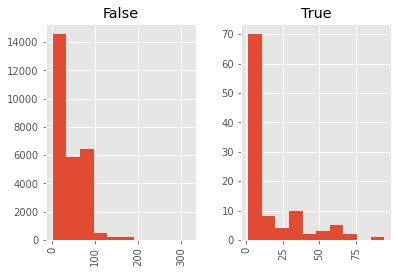

In [ ]:
df.hist(by='Branded', column='Rank')

#Generate Histograms of Branded Keywords (True = Branded, False = NonBranded) & Their CTR

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49b02e1208>,
      dtype=object)

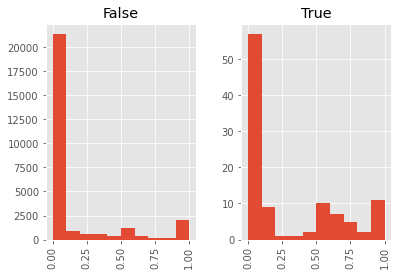

In [ ]:
df.hist(by='Branded', column='CTR')

#Generate Histograms of Branded Keywords (True = Branded, False = NonBranded) & Their Clicks

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49b507d160>,
      dtype=object)

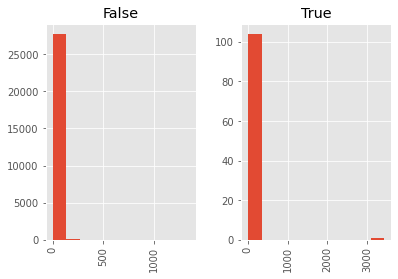

In [ ]:
df.hist(by='Branded', column='Clicks')

#Generate a Correlation Table

In [ ]:
corr = df.corr()
corr

,Clicks,Average Position,Site CTR,Impressions,Branded
Clicks,1.000000,-0.086388,0.049744,0.346452,0.098871
Average Position,-0.086388,1.000000,-0.388064,-0.007917,-0.041134
Site CTR,0.049744,-0.388064,1.000000,-0.034692,0.030044
Impressions,0.346452,-0.007917,-0.034692,1.000000,-0.001101
Branded,0.098871,-0.041134,0.030044,-0.001101,1.000000


#Correlation Heatmap (add color to make it easier to read):

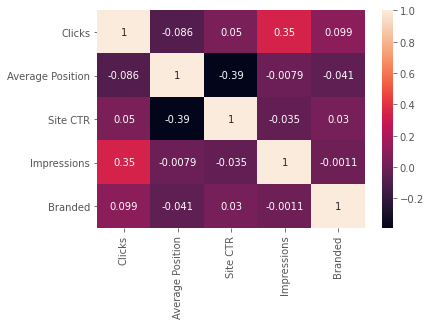

In [ ]:
df_small = df.iloc[:,:6]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

#Load Filter-able Data Table

In [ ]:
 %load_ext google.colab.data_table
 df

A few interesting features of the data table display:

- Clicking the <button>Filter</button> button in the upper right allows you to search for terms or values in any particular column.
- Clicking on any column title lets you sort the results according to that column's value.
- The table displays only a subset of the data at a time. You can navigate through pages of data using the controls on the lower right.


In [ ]:
df

#Disabaling Table View

In [ ]:
%unload_ext google.colab.data_table
df

,Query,Clicks,Average Position,Site CTR,Impressions
0,seer interactive,3444,1.407144,0.597191,5767
1,google data studio,1352,8.237460,0.003478,388735
2,johari window exercise,992,1.128184,0.414196,2395
3,keywords everywhere,985,6.454694,0.006399,153930
4,google discovery,910,3.242859,0.060449,15054
...,...,...,...,...,...
27900,url crawl,0,26.597458,0.000000,236
27901,how to do outreach,0,78.058824,0.000000,17
27902,keyword search terms,0,80.666667,0.000000,6
27903,native adv,0,4.375000,0.000000,8


#Change Branded Boolean Values (True/False) --> Integers (1/0) for a Basic Linear Regression


In [ ]:
df['Branded'] = df['Branded']*1

#Check to make sure the Branded Column is now in an int64 format:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27905 entries, 0 to 27904
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Query             27905 non-null  object 
 1   Clicks            27905 non-null  int64  
 2   Average Position  27905 non-null  float64
 3   Site CTR          27905 non-null  float64
 4   Impressions       27905 non-null  int64  
 5   Branded           27905 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ MB


#If you need to alter any other values for your Linear Regression to an integer format:

In [ ]:
#df['Rank'].astype('int')
#df['Rank'] = df['Rank'].astype('int')
#df.dtypes

Query                object
Clicks                int64
Average Position      int64
Site CTR            float64
Impressions           int64
Branded                bool
dtype: object

#Check to make sure Branded Column values are showing 1 for Branded Keywords & 0 for non Branded.

In [ ]:
df

,Query,Clicks,Average Position,Site CTR,Impressions,Branded
0,seer interactive,3444,1.407144,0.597191,5767,1
1,google data studio,1352,8.237460,0.003478,388735,0
2,johari window exercise,992,1.128184,0.414196,2395,0
3,keywords everywhere,985,6.454694,0.006399,153930,0
4,google discovery,910,3.242859,0.060449,15054,0
...,...,...,...,...,...,...
27900,url crawl,0,26.597458,0.000000,236,0
27901,how to do outreach,0,78.058824,0.000000,17,0
27902,keyword search terms,0,80.666667,0.000000,6,0
27903,native adv,0,4.375000,0.000000,8,0


#Perform a Simple Linear Regression Model to Better Describe the Data

Substitute your values/column names in below if different.

Remember, this isn't supposed to be predictive. It's primarily to better describe/understand your data.

In [ ]:
# Simple Linear Regression


#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = df['CTR']
x = df[['Rank','Branded']]

# Train the model using the training sets
regr.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The first coeficient # is multiplyed by your first x value above.

If you see a second coeficient #, that is multiplied by your second x value above. 

These two values are then added together + added to the intercept below.

In [ ]:
regr.coef_

array([-0.00320727,  0.06721488])

In [ ]:
regr.intercept_

0.2635564810462664

In [ ]:
#Example: Site CTR Predicted = 0.1809 + -0.0109*Average Position + 0.0672*Branded

#Example of Described CTR curve:

#1 = 17%
#2 = 16%
#3 = 15%
#4 = 14%
#5 = 13%
#6 = 12%
#7 = 10%
#8 = 9%
#9 = 8%
#10 = 7%